# Measuring Curvature

In the last exercise, you located the lane line pixels, used their x and y pixel positions to fit a second order polynomial curve:

$ f(y) = Ay^2 + By + C$

### Radius of Curvature  

$ R_{curve} = \frac{[1+(\frac{dx}{dy})^2]^{3/2}}{|{\frac{d^2x}{dy^2}}|} $

#### First + Second Derivative 

$ \frac{dx}{dy} = 2Ay+B $

$ \frac{d^2x}{dy^2} = 2A $

=> $ R_{curve} = \frac{[1+(2Ay+B)^2]^{3/2}}{|{2A}|} $

The $y$ values of your image increase from top to bottom, so if, for example, you wanted to measure the radius of curvature closest to your vehicle, you could evaluate the formula above at the $y$ value corresponding to the bottom of your image, or in Python, at `yvalue = image.shape[0]`.

### Implementing the Calculation

#### Generate some fake data to visualize with

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


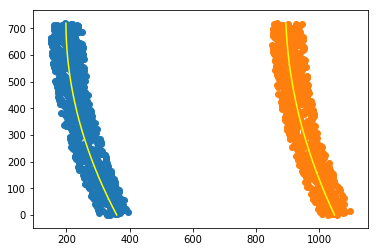

In [2]:
def generate_data(quadratic_coeff = 3e-4, seed = 0):
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # for testing purposes 
    np.random.seed(seed)

    ploty = np.linspace(0,719, num=720)
    
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50,high=51) for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50,high=51) for y in ploty])
    
    # reverse for top-to-bottom in y values
    leftx = leftx[::-1]
    rightx = rightx[::-1]
    
    left_fit = np.polyfit(ploty, leftx, 2)
    right_fit = np.polyfit(ploty, rightx, 2)
    
    return ploty, left_fit, right_fit, (leftx, rightx)

# Visualization 
ploty, left_fit, right_fit, (leftx, rightx) = generate_data()

left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.scatter(leftx, ploty)
plt.scatter(rightx, ploty)

#### Implementing calculation itself

implement radius of curvature calculation using fake data 
use $R_{curve}$ to calculate the left + right curve radius 

In [4]:
def measure_curvature_pixels():
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    ploty, left_fit, right_fit, _ = generate_data()
    
    # Define y to find radius of curvature, max y value corresponding to bottom of image
    y = np.max(ploty)
    
    # calculate R_curve 
    # R_curve = ([1+(2Ay+B)^2]^(3/2)) / |2A|
    left_curverad = (1+(2*left_fit[0]*y+left_fit[1])**2)**(3/2) / np.abs(2*left_fit[0])
    right_curverad = (1+(2*right_fit[0]*y+right_fit[1])**2)**(3/2) / np.abs(2*right_fit[0])
    
    return left_curverad, right_curverad

left_curverad, right_curverad = measure_curvature_pixels()
print(left_curverad, right_curverad)

1625.0601831657204 1976.2967307714334


## From Pixels to Real-World

But now we need to stop and think... We've calculated the radius of curvature based on pixel values, so the radius we are reporting is in pixel space, which is not the same as real world space. So we actually need to repeat this calculation after converting our x and y values to real world space.

This involves measuring how long and wide the section of lane is that we're projecting in our warped image. We could do this in detail by measuring out the physical lane in the field of view of the camera, but for this project, you can assume that if you're projecting a section of lane similar to the images above, the lane is about 30 meters long and 3.7 meters wide.

Or, if you prefer to derive a conversion from pixel space to world space in your own images, compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and the dashed lane lines are 10 feet or 3 meters long each.

In [6]:
def generate_data(ym_per_pix, xm_per_pix, quadratic_coeff = 3e-4, seed = 0):
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # for testing purposes 
    np.random.seed(seed)

    ploty = np.linspace(0,719, num=720)
    
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50,high=51) for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50,high=51) for y in ploty])
    
    # reverse for top-to-bottom in y values
    leftx = leftx[::-1]
    rightx = rightx[::-1]
    
    left_fit = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    return ploty, left_fit, right_fit, (leftx, rightx)

def measure_curvature_real(ym_per_pix = 30/720, xm_per_pix = 3.7/700):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    ploty, left_fit, right_fit, _ = generate_data(ym_per_pix, xm_per_pix)
    
    # Define y to find radius of curvature, max y value corresponding to bottom of image
    y = np.max(ploty)
    
    # calculate R_curve 
    # R_curve = ([1+(2Ay+B)^2]^(3/2)) / |2A|
    left_curverad = (1+(2*left_fit[0]*y*ym_per_pix+left_fit[1])**2)**(3/2) / np.abs(2*left_fit[0]) 
    right_curverad = (1+(2*right_fit[0]*y*ym_per_pix+right_fit[1])**2)**(3/2) / np.abs(2*right_fit[0])
    
    return left_curverad, right_curverad

# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')

533.7525889210938 m 648.157485143441 m
